**Team Member**


1.   Marim Ashraf Elsayed Mahmoud Amer
2.   Mawada Ashraf Elsayed Mahmoud Amer
3.   Youmna Alsayed Abdalatty Mohamed



# Fashion-MNIST CNN

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from keras.datasets import fashion_mnist
from matplotlib import pyplot
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split,GridSearchCV, KFold,cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
import keras 
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten,GlobalAveragePooling2D
from keras import regularizers
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# from keras.optimizers import Adam

In [ ]:
#connect to my drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read all our traning data
train = pd.read_csv ('/content/drive/MyDrive/Queens_Practical/Deep_Learning/project2/fashion-mnist_train.csv')
train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#read all our testing data
test = pd.read_csv ('/content/drive/MyDrive/Queens_Practical/Deep_Learning/project2/fashion-mnist_test.csv')
test.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#check Shape of train and test data(rows, columns)
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


# Data Preparation

## Describe Data

**Fashion-MNIST** is a dataset that includes a **60,000-item training** set and a **10,000-item test** set. Each image is a ** 28x28 grayscale** graphic with a label from **one of ten categories**. The training and testing splits have the same picture size and structure.\
Each image has a height of 28 pixels and a width of 28 pixels, for a total of 784 pixels. Each pixel has a single pixel-value that indicates its lightness or darkness, with larger numbers representing darker pixels. This **pixel value** is an integer ranging from **0 to 255**. There are **785 columns** in both the training and test data sets.

In [ ]:
train.describe() # To know mean, std and so on to data exist

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [ ]:
train.info() # Show all information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


The dataset have 785 columns and 60000 samples

## Clean data

In [ ]:
#Check null data
print(train.isnull().sum().sort_values(ascending = True))
print(test.isnull().sum().sort_values(ascending = True))

label       0
pixel517    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel268    0
pixel784    0
Length: 785, dtype: int64
label       0
pixel517    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel268    0
pixel784    0
Length: 785, dtype: int64


In [ ]:
#Check duplicated data
print(train.duplicated().sum())
print(test.duplicated().sum())

43
1


In [ ]:
#Remove duplicated rows in training data
train.drop_duplicates(keep='first',inplace=True)
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Remove duplicated rows in testing data
test.drop_duplicates(keep='first',inplace=True)
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Drop all rows have a nan value
train.dropna()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split data

Split data into training and testing data by using iloc\
X will contain all features except label column.\
y will contain label column.

In [ ]:
#Training data
X_train= train.iloc[:, 1:]  #All column except label column
y_train= train.iloc[:, 0]   #only it has label column
X_train.shape   #Shape of the X_train data(rows, columns)

(59957, 784)

In [ ]:
#Testing data
X_test= train.iloc[:, 1:]  #All column except label column
y_test= train.iloc[:, 0]   #only it has label column
X_test.shape   #Shape of the X_test data(rows, columns)

(59957, 784)

## Visualize Data

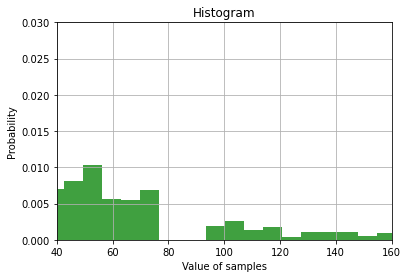

In [ ]:
# the histogram of the data
# n are the values of the histogram bins.
# bins defines the number of equal-width bins in the range
# patches: If there are many input datasets, this function is used to generate a histogram or a list of such containers.
n, bins, patches = plt.hist(X_train[30:40], 3, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Value of samples')
plt.ylabel('Probability')
plt.title('Histogram')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

In [ ]:
#Unique values and their counts
y_train.value_counts()

5    6000
8    6000
9    5998
0    5998
3    5997
7    5996
1    5996
4    5995
6    5989
2    5988
Name: label, dtype: int64

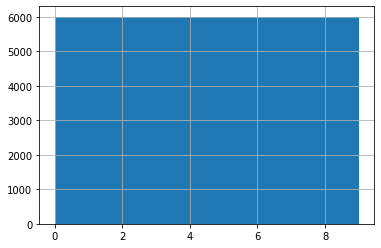

In [ ]:
y_train.hist(bins=10) # Draw histogram for label column

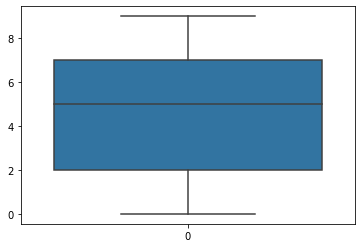

In [ ]:
# Draw Boxplot for y_train features to determine outliers
sns.boxplot(data=y_train)

There is no outlier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


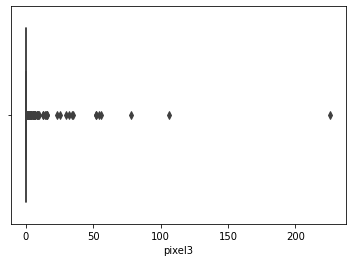

In [ ]:
# Draw Boxplot for pixel3 feature to determine outliers
sns.boxplot('pixel3', data=X_train)

There are outliers that are more than 80

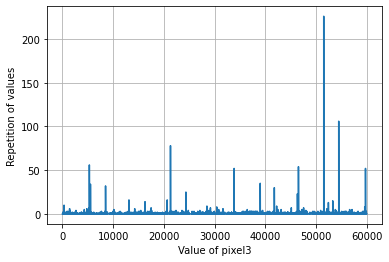

In [ ]:
plt.plot(train['pixel3']) # Draw plot for pixel3 feature
plt.xlabel('Value of pixel3')
plt.ylabel('Repetition of values')
plt.grid(True)
plt.show()

The most frequent value is 50600

## Draw some of the images

Draw some of the fashion minist using imshow function

In [ ]:
X_train_arr = np.array(X_train, dtype='float32') # Convert X_train to an array to be able to draw dataset images
y_train_arr = np.array(y_train, dtype='float32') # Convert y_train to an array to be able to draw dataset images

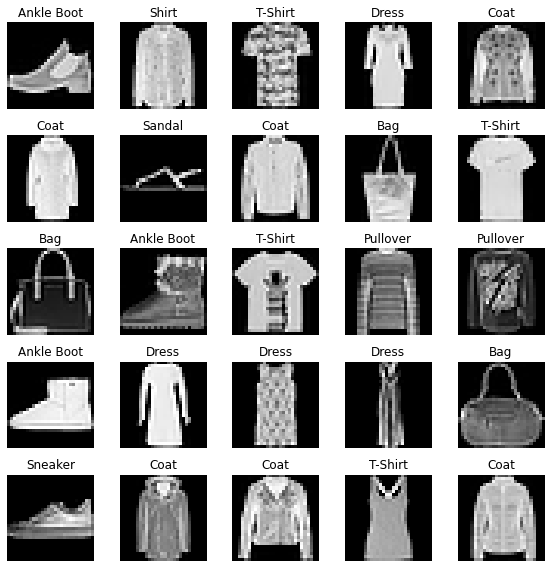

In [ ]:
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'} # Put a number on each label
# figure used to create a figure object
fig = plt.figure(figsize=(8, 8))

for i in range(1, 5 * 5+1):
    img = X_train_arr[i].reshape(28, 28) # respahe X_trian 
    label = labels_map[y_train_arr[i]]  # To get each image with its label,

    fig.add_subplot(5, 5, i)
    plt.title(label)  # title of each image
    plt.imshow(img, cmap='gray')
    plt.axis('off') # remove axis numbers
plt.tight_layout()  # Padding between and surrounding subplots can be adjusted.
plt.show()

##  Correlation analysis

In [ ]:
# Display the correlation between features by using corr function
X_train.corr()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
pixel1,1.000000,0.297899,0.067551,0.046607,0.026630,0.026172,0.012096,0.012225,0.009644,0.000056,...,-0.000641,0.004628,0.004609,0.000975,-0.002305,-0.002442,-0.000109,0.008764,0.026388,0.041581
pixel2,0.297899,1.000000,0.575033,0.138709,0.054353,0.033184,0.022766,0.017138,0.016821,0.010920,...,0.000494,0.004861,0.006817,0.002097,-0.004427,-0.002341,0.004271,0.014215,0.021296,0.022161
pixel3,0.067551,0.575033,1.000000,0.387468,0.118136,0.087300,0.060937,0.035942,0.029674,0.021493,...,0.010095,0.016706,0.018323,0.006163,-0.003821,-0.001494,0.006861,0.013151,0.009946,0.015657
pixel4,0.046607,0.138709,0.387468,1.000000,0.573172,0.325683,0.242987,0.141033,0.085302,0.051147,...,0.009690,0.018710,0.023391,0.016759,0.009700,0.010101,0.023940,0.012388,0.003072,0.008422
pixel5,0.026630,0.054353,0.118136,0.573172,1.000000,0.692892,0.423635,0.230693,0.136391,0.075677,...,0.017999,0.031159,0.039577,0.028505,0.019531,0.021514,0.025971,0.028859,0.022939,0.007124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,-0.002442,-0.002341,-0.001494,0.010101,0.021514,0.032318,0.027065,0.019507,0.024986,0.029775,...,-0.074218,-0.008964,0.043000,0.336772,0.790184,1.000000,0.749621,0.349134,0.178656,0.073421
pixel781,-0.000109,0.004271,0.006861,0.023940,0.025971,0.038560,0.030478,0.026278,0.034245,0.039906,...,-0.042288,0.008640,0.045504,0.131133,0.439563,0.749621,1.000000,0.645871,0.334548,0.133829
pixel782,0.008764,0.014215,0.013151,0.012388,0.028859,0.044113,0.029461,0.022747,0.020991,0.016768,...,-0.002795,0.034103,0.074004,0.092843,0.152620,0.349134,0.645871,1.000000,0.658959,0.225500
pixel783,0.026388,0.021296,0.009946,0.003072,0.022939,0.030802,0.016128,0.005947,0.000090,-0.011062,...,0.001906,0.026552,0.054235,0.077767,0.101160,0.178656,0.334548,0.658959,1.000000,0.451929


There are large correlation between pixel 781 and pixel 780, and between pixel 782 and pixel 783.\
There are large correlation between pixel 4 and pixel 783, and between pixel 9 and pixel 783.


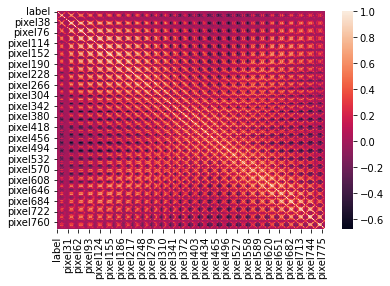

In [ ]:
datavis=sns.heatmap(train.corr()) # Heatmap used to visualize correlation between features

The correlation between a feature and itself equals 1.\
The correlation between features and each other is a negative coefficient, which tells us that the relationship is negative, and a positive coefficient, which tells us that the relationship is positive.

## Lable Encoder

In [ ]:
#Display Unique values in label and their counts
print(train['label'].value_counts())

5    6000
8    6000
9    5998
0    5998
3    5997
7    5996
1    5996
4    5995
6    5989
2    5988
Name: label, dtype: int64


In [ ]:
# Converting Labels to one hot encoded format
label_enc= preprocessing.LabelEncoder()
y_train= label_enc.fit_transform(y_train)
y_test= label_enc.fit_transform(y_test)

## Normalization

Normalize data to ensure all data have the same range of values.

In [ ]:
from sklearn import preprocessing
'''
  1- Convert all data into array
  2- Divide all data by 255 to normalise data.
  3- Change data types
'''
X_train_arr= np.array(X_train)
y_train_arr= np.array(y_train)

X_test_arr= np.array(X_test)
y_test_arr= np.array(y_test)

X_train_arr= X_train_arr / 255.0
X_test_arr= X_test_arr / 255.0

X_train_arr = X_train_arr.astype('float32')
X_test_arr = X_test_arr.astype('float32')

In [ ]:
# Show shape of X_train_arr and X_test_arr
print(X_train_arr.shape)
print(X_test_arr.shape)

(59957, 784)
(59957, 784)


# Training a neural network

In [ ]:
#Reshape the input 
X_train_arr = X_train_arr.reshape(X_train_arr.shape[0], 28, 28, 1)

In [ ]:
# Function to create and built the model and it is return a model

def create_model():
  model = Sequential()

	# Conv2D is a two-dimensional convolution layer that generates a tensor of outputs by winding a convolution kernel with the layers input
  # MaxPool2D used to reduces the dimensionality of images that is  by reducing the number of pixels in the output from the previous convolutional layer. 

  # convolutional layer with 32 filters, and a 5*5 mask, with same padding
  model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1))) 
  # max pooling with stride equal 2
  model.add(MaxPool2D(strides=2))
  # convolutional layer with 48 filters, and a 5*5 mask, with ReLU activation function
  model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
  # max pooling with stride equal 2
  model.add(MaxPool2D(strides=2))
	# Flatten layer flatten the layer by turning the data to a one-dimensional array and passing it on to the next.
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(84, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  # summary show structure of the model
  model.summary()
  
  # compile model with optimizer, loss values for each task, loss 
  model.compile(loss="sparse_categorical_crossentropy",metrics='accuracy',optimizer='Adam')
  return model

In [ ]:
'''
Function to evaluate a model using k-fold cross-validation

	Inputs:
		1- X data
		2- y data
		3- Number of k folds
		4- Number of batch size
		5- Booling variable for early stopping( if 1 means the model have early stopping of zero means the model have not early stopping)
	 Return (Outputs): lists of all k folds 
		1- Scores
		2- Histories
		3- Models

'''
def evaluate_model(dataX, dataY, n_folds=5, btch_size=32, flag_early_stop = 0):
	# Create empty list for each scores, histories, and models
	scores, histories,models = list(), list(),list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# Call create_model function to built the model
		model = create_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		if(flag_early_stop == 0):
			history = model.fit(trainX, trainY, epochs=10, batch_size=btch_size, validation_data=(testX, testY), verbose=2)
		else:
			history = model.fit(trainX, trainY, epochs=10, batch_size=btch_size, validation_data=(testX, testY),  
		                    callbacks=[ tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5) ], verbose=2)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores, histories, and models
		scores.append(acc)
		histories.append(history)
		models.append(model)

	return scores, histories,models

Before these trials, we tried different hyperparameters, but it was these hyperparameters that gave us the best accuracy. \
The following trials Show if the model improves the accuracy or not.
 1. The first trial we will call the evaluate_model function, but without early stopping. 
 2. The second trial we will call the evaluate_model function, but we will use early stopping to reduce overfitting that exists in the model.

## Trial 1

In [ ]:
# Call evaluate_model to evaluate a model using k-fold cross-validation
scores,histories,models= evaluate_model(X_train_arr,y_train_arr)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 256)               3

In [ ]:
# Print the values of each score, history, and model that came from the evaluate_model function.
print(scores)
print(histories)
print(models)

[0.9080219864845276, 0.9101901054382324, 0.9130181074142456, 0.9156867861747742, 0.9176048636436462]
[<keras.callbacks.History object at 0x7f2c50190fd0>, <keras.callbacks.History object at 0x7f2c500c67d0>, <keras.callbacks.History object at 0x7f2c404f5a50>, <keras.callbacks.History object at 0x7f2c40393690>, <keras.callbacks.History object at 0x7f2c4016a990>]
[<keras.engine.sequential.Sequential object at 0x7f2c502262d0>, <keras.engine.sequential.Sequential object at 0x7f2c500d4390>, <keras.engine.sequential.Sequential object at 0x7f2c50591cd0>, <keras.engine.sequential.Sequential object at 0x7f2c50680510>, <keras.engine.sequential.Sequential object at 0x7f2c4021ee10>]


In [ ]:
# We need the index of the best model
# Use max to get the best model then we get the index of the best model.
print(max(scores))
best_index=scores.index(max(scores))
print(best_index)

0.9176048636436462
4


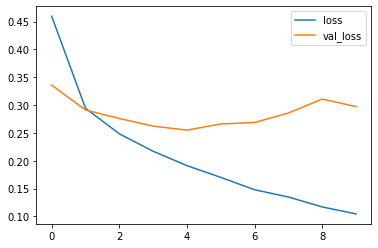

In [ ]:
# Draw a graph depicting the relationship between loss and validation loss of know about the model's performance
plt.plot(histories[best_index].history['loss'], label='loss')
plt.plot(histories[best_index].history['val_loss'], label='val_loss')
plt.legend()
plt.show()

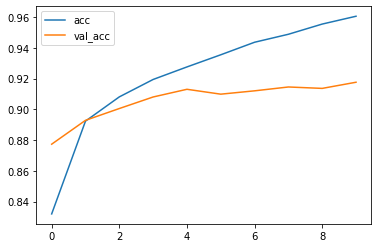

In [ ]:
# Draw a graph depicting the relationship between accuracy and validation accuracy of know about the model's performance
plt.plot(histories[best_index].history['accuracy'], label='acc')
plt.plot(histories[best_index].history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
# Function to evaluate the model then return the value of loss and accuracy
def evaluate(model,X,y):
  loss, acc = model.evaluate(X, y)
  return loss, acc

In [ ]:
# Reshape x test to have the same shape as input_shape
print(y_test_arr.shape)
print(X_test_arr.shape)
X_ts=X_test_arr.reshape(X_test_arr.shape[0],28,28,1)
print(X_ts.shape)


(59957,)
(59957, 784)
(59957, 28, 28, 1)


In [ ]:
# Call evaluate to evaluate the model
loss, acc = evaluate(models[best_index],X_ts,y_test_arr)

1874/1874 [==============================] - 9s 5ms/step - loss: 0.1244 - accuracy: 0.9600


## Trial 2

In [ ]:
# Call evaluate_model to evaluate a model using k-fold cross-validation
scores,histories,models= evaluate_model(X_train_arr,y_train_arr, btch_size=32, flag_early_stop = 1)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 48)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 1200)              0         
                                                                 
 dense_30 (Dense)            (None, 256)             

In [ ]:
# Print the values of each score, history, and model that came from the evaluate_model function.
print(scores)
print(histories)
print(models)

[0.9148598909378052, 0.9191127419471741, 0.9136852622032166, 0.9104328155517578, 0.9142690300941467]
[<keras.callbacks.History object at 0x7f2baa0e0d50>, <keras.callbacks.History object at 0x7f2b23702050>, <keras.callbacks.History object at 0x7f2b23473290>, <keras.callbacks.History object at 0x7f2b232f5b50>, <keras.callbacks.History object at 0x7f2b230e1bd0>]
[<keras.engine.sequential.Sequential object at 0x7f2baa12b690>, <keras.engine.sequential.Sequential object at 0x7f2b236dca50>, <keras.engine.sequential.Sequential object at 0x7f2b236287d0>, <keras.engine.sequential.Sequential object at 0x7f2b2337b8d0>, <keras.engine.sequential.Sequential object at 0x7f2b232f56d0>]


In [ ]:
# We need the index of the best model
# Use max to get the best model then we get the index of the best model.
print(max(scores))
best_index=scores.index(max(scores))
print(best_index)

0.9191127419471741
1


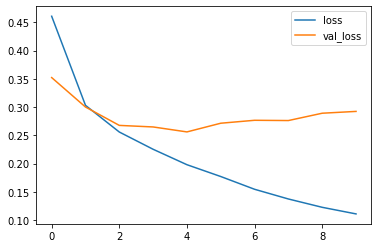

In [ ]:
# Draw a graph depicting the relationship between loss and validation loss of know about the model's performance
plt.plot(histories[best_index].history['loss'], label='loss')
plt.plot(histories[best_index].history['val_loss'], label='val_loss')
plt.legend()
plt.show()

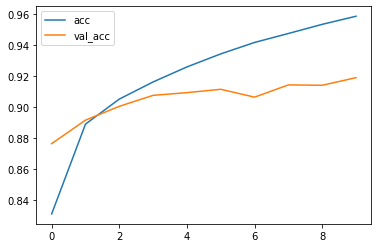

In [ ]:
# Draw a graph depicting the relationship between accuracy and validation accuracy of know about the model's performance
plt.plot(histories[best_index].history['accuracy'], label='acc')
plt.plot(histories[best_index].history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
# Function to evaluate the model then return the value of loss and accuracy
def evaluate(model,X,y):
  loss, acc = model.evaluate(X, y)
  return loss, acc

In [ ]:
# Reshape x test to have the same shape as input_shape
print(y_test_arr.shape)
print(X_test_arr.shape)
X_ts=X_test_arr.reshape(X_test_arr.shape[0],28,28,1)
print(X_ts.shape)

(59957,)
(59957, 784)
(59957, 28, 28, 1)


In [ ]:
# Call evaluate to evaluate the model
loss, acc =evaluate(models[best_index],X_ts,y_test_arr)

1874/1874 [==============================] - 5s 3ms/step - loss: 0.1165 - accuracy: 0.9631


From previous trials:\
Trial 1: loss: 0.1244 - accuracy: 0.9600 \
Trial 2 : loss: 0.1165 - accuracy: 0.9631 \
So LeNet-5 improves the accuracy as we reduce overfitting and the changing of hyper parameters means improved accuracy.

#Transfer Learning

In [ ]:
# Converting Labels to categorical encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# dstack is a command that stacks arrays in depth order.
# Used to convert image from gray scale into RGB
x_train_model=np.dstack([X_train_arr] * 3)
x_test_model=np.dstack([X_test_arr]*3)

In [ ]:
# Show the shape of the x train
x_train_model.shape

(59957, 784, 3)

In [ ]:
# Reshape x train and x test into 28*28
x_train_model = x_train_model.reshape(-1, 28,28,3)
x_test_model= x_test_model.reshape (-1,28,28,3)

In [ ]:
# Show the shape of the x test and x train
print(x_test_model.shape)
print(x_train_model.shape)

(59957, 28, 28, 3)
(59957, 28, 28, 3)


In [ ]:
# Resize the trianing and testing images into 48 * 48
x_train_model = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train_model])
x_test_model = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test_model])

In [ ]:
# Splitting train data as train and validation data
x_train,x_val,y_train,y_val = train_test_split(x_train_model,
                                              y_train,
                                              test_size=0.2,
                                              random_state=20
                                              )

In [ ]:
# Convert the image to a model-appropriate format
x_train_model = preprocess_input(x_train)
x_val_model = preprocess_input(x_val)
x_test_model = preprocess_input(x_test_model)

In [ ]:
# Current shape of features
print(x_train_model.shape)
print(x_test_model.shape)
print(x_val_model.shape)

(47965, 48, 48, 3)
(59957, 48, 48, 3)
(11992, 48, 48, 3)


## VGG Model

In [ ]:
#Create base model of VGG16
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=(48, 48, 3))
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
# Extracting important features from x train, x test, and x validation image
x_train_vgg = model_vgg.predict(np.array(x_train_model), batch_size=16, verbose=1)
x_test_vgg = model_vgg.predict(np.array(x_test_model), batch_size=16, verbose=1)
x_val_vgg = model_vgg.predict(np.array(x_val_model), batch_size=16, verbose=1)

750/750 [==============================] - 17s 22ms/step


In [ ]:
# Current shape of features
print(x_train_vgg.shape)
print(x_test_vgg.shape)
print(x_val_vgg.shape)

(47965, 1, 1, 512)
(59957, 1, 1, 512)
(11992, 1, 1, 512)


In [ ]:
# Reshape extracted features
x_train_vgg = np.reshape(x_train_vgg, (47965, 1*1*512))
x_test_vgg = np.reshape(x_test_vgg, (59957, 1*1*512))
x_val_vgg = np.reshape(x_val_vgg, (11992, 1*1*512))

In [ ]:
# Do freeze the weight that moves all the layer's weights from trainable to non-trainable.
for layer in model_vgg.layers:
      layer.trainable = False
      
model = Sequential()
# Add new layers
model.add(Dense(256, activation='relu', input_dim=(1*1*512)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model.
model.compile(loss='categorical_crossentropy', optimizer='Adam',
    metrics=['accuracy'])

In [ ]:
# Train the the model
history = model.fit(
    x_train_vgg,
    y_train,
    batch_size=30,
    epochs=100,
    validation_data=(x_val_vgg, y_val),
    callbacks=[
      tf.keras.callbacks.EarlyStopping(monitor='val_loss',
      min_delta=0,
      patience=10,
      verbose=1,
      mode='auto' ) # val_loss raised 5 times, the fit will be stopped.
    ]
)

Epoch 1/100
1599/1599 [==============================] - 9s 6ms/step - loss: 1.9971 - accuracy: 0.2652 - val_loss: 2.0042 - val_accuracy: 0.2633
Epoch 2/100
1599/1599 [==============================] - 7s 4ms/step - loss: 1.9915 - accuracy: 0.2653 - val_loss: 1.9849 - val_accuracy: 0.2766
Epoch 3/100
1599/1599 [==============================] - 7s 4ms/step - loss: 1.9933 - accuracy: 0.2664 - val_loss: 1.9940 - val_accuracy: 0.2703
Epoch 4/100
1599/1599 [==============================] - 7s 4ms/step - loss: 1.9812 - accuracy: 0.2714 - val_loss: 1.9536 - val_accuracy: 0.2816
Epoch 5/100
1599/1599 [==============================] - 7s 5ms/step - loss: 1.9750 - accuracy: 0.2724 - val_loss: 1.9479 - val_accuracy: 0.2874
Epoch 6/100
1599/1599 [==============================] - 7s 4ms/step - loss: 1.9704 - accuracy: 0.2771 - val_loss: 1.9981 - val_accuracy: 0.2487
Epoch 7/100
1599/1599 [==============================] - 7s 4ms/step - loss: 1.9729 - accuracy: 0.2738 - val_loss: 1.9678 - val_ac

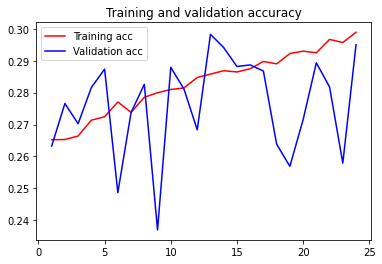

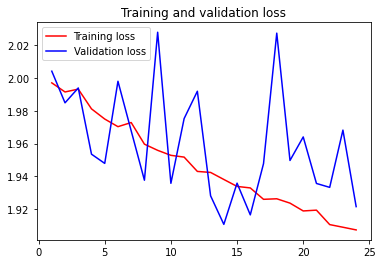

In [ ]:
# plot the loss and accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1) # number of epochs

plt.title('Training and validation accuracy') # graph title
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend() # legend is an area describing the elements of the graph

plt.figure()
plt.title('Training and validation loss') # graph title
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend() # legend is an area describing the elements of the graph

plt.show()

In [ ]:
# Evaluate the model
score = model.evaluate(x_test_vgg, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1874/1874 [==============================] - 6s 3ms/step - loss: 1.9051 - accuracy: 0.2983
Test loss: 1.905113935470581
Test accuracy: 0.29831379652023315


## Resnet Model

In [ ]:
# Create base model of ResNet50
model = ResNet50(include_top=False, input_shape=(48,48,3), weights='imagenet')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
# Do freeze the weight that moves all the layer's weights from trainable to non-trainable.
for layer in model.layers:
      layer.trainable = False
      
# Add the Resnet convolutional base model
output = model.output
# Add new layers
output = GlobalAveragePooling2D()(output)
output = Dense(units=10, activation='softmax')(output)
model = Model(model.input, output)

In [ ]:
# Compile the model.
model.compile(loss='categorical_crossentropy', optimizer='Adam',
    metrics=['categorical_accuracy'])

In [ ]:
# Train the the model
history = model.fit(
    x_train_model,
    y_train,
    batch_size=30,
    epochs=100,
    validation_data=(x_val_model, y_val),
    callbacks=[
      tf.keras.callbacks.EarlyStopping(monitor='val_loss',
      min_delta=0,
      patience=5,
      verbose=1,
      mode='auto' ) # val_loss raised 5 times, the fit will be stopped.
    ]
)

Epoch 1/100
1599/1599 [==============================] - 104s 57ms/step - loss: 2.1146 - categorical_accuracy: 0.2334 - val_loss: 2.0162 - val_categorical_accuracy: 0.2689
Epoch 2/100
1599/1599 [==============================] - 89s 55ms/step - loss: 1.9772 - categorical_accuracy: 0.2884 - val_loss: 1.9516 - val_categorical_accuracy: 0.2762
Epoch 3/100
1599/1599 [==============================] - 88s 55ms/step - loss: 1.9251 - categorical_accuracy: 0.3103 - val_loss: 1.9176 - val_categorical_accuracy: 0.2954
Epoch 4/100
1599/1599 [==============================] - 87s 54ms/step - loss: 1.8909 - categorical_accuracy: 0.3229 - val_loss: 1.8659 - val_categorical_accuracy: 0.3358
Epoch 5/100
1599/1599 [==============================] - 87s 54ms/step - loss: 1.8642 - categorical_accuracy: 0.3347 - val_loss: 1.8363 - val_categorical_accuracy: 0.3514
Epoch 6/100
1599/1599 [==============================] - 87s 55ms/step - loss: 1.8439 - categorical_accuracy: 0.3412 - val_loss: 1.8366 - val_ca

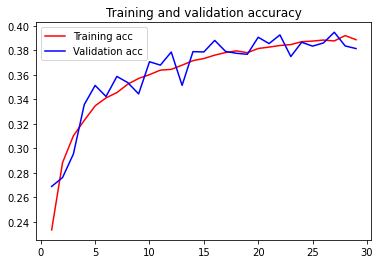

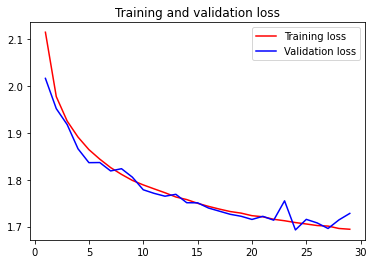

In [ ]:
# plot the loss and accuracy
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1) # number of epochs

plt.title('Training and validation accuracy') # graph title
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend() # legend is an area describing the elements of the graph

plt.figure()
plt.title('Training and validation loss') # graph title
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend() # legend is an area describing the elements of the graph

plt.show()

In [ ]:
# Evaluate the model
score = model.evaluate(x_test_model, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1874/1874 [==============================] - 84s 44ms/step - loss: 1.7249 - categorical_accuracy: 0.3838
Test loss: 1.7248773574829102
Test accuracy: 0.3837750256061554


## Result of Transfer Learning

VGG Model
1. Test loss: 1.905113935470581
2. Test accuracy: 0.29831379652023315 

Resnet Model:
1. Test loss: 1.7248773574829102
2. Test accuracy: 0.3837750256061554

As a result of transfer learning, the LeNet-5 is superior to transfer learning models because we built the model from scratch, which means that the model was trained using only the dataset that I had, rather than another dataset like transfer learning (where I took weights from another dataset to train our model), so the model trained weights that were compatible with our dataset, resulting in higher accuracy than transfer learning models.